In [1]:
from scipy.io import arff
import numpy as np
from sklearn.metrics import balanced_accuracy_score

data, meta = arff.loadarff('data/phoneme.arff')
data

array([( 0.489927, -0.451528, -1.04799 , -0.598693, -0.020418, b'1'),
       (-0.641265,  0.109245,  0.29213 , -0.916804,  0.240223, b'1'),
       ( 0.870593, -0.459862,  0.578159,  0.806634,  0.835248, b'1'), ...,
       ( 0.246882, -0.793228,  1.190101,  1.423194, -1.303036, b'2'),
       (-0.778907, -0.383111,  1.727029, -1.432389, -1.208085, b'1'),
       (-0.794604, -0.640053,  0.632221,  0.72028 , -1.231182, b'2')],
      dtype=[('V1', '<f8'), ('V2', '<f8'), ('V3', '<f8'), ('V4', '<f8'), ('V5', '<f8'), ('Class', 'S1')])

In [2]:
data = np.array(data.tolist(), dtype=float)
x = data[:, :-1]
y= (data[:, -1] - 1)
x

array([[ 0.489927, -0.451528, -1.04799 , -0.598693, -0.020418],
       [-0.641265,  0.109245,  0.29213 , -0.916804,  0.240223],
       [ 0.870593, -0.459862,  0.578159,  0.806634,  0.835248],
       ...,
       [ 0.246882, -0.793228,  1.190101,  1.423194, -1.303036],
       [-0.778907, -0.383111,  1.727029, -1.432389, -1.208085],
       [-0.794604, -0.640053,  0.632221,  0.72028 , -1.231182]])

In [3]:
y

array([0., 0., 0., ..., 1., 0., 1.])

In [13]:
from sklearn.model_selection import train_test_split

from src.model.LogisticRegression import LogisticRegression
from src.optim.IWLS import IWLS
from src.optim.conditions import MaxIterationCondition

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

accs = []
for i in range(1, 20):
    model = LogisticRegression()
    optim = IWLS(model, MaxIterationCondition(i))

    model = optim.optimize(train_x, train_y)

    balanced_acc = balanced_accuracy_score(test_y, model.predict(test_x))
    accs.append(balanced_acc)


<Axes: >

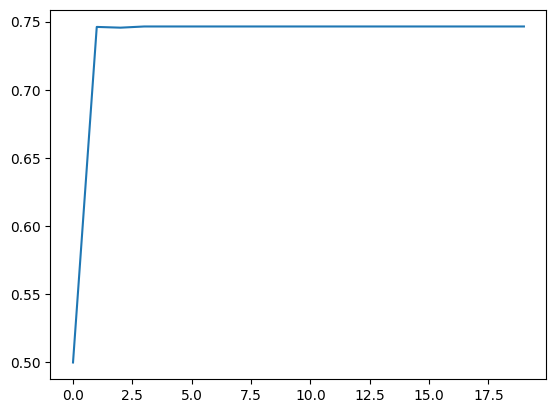

In [12]:
import seaborn as sns
sns.lineplot(x=list(range(20)), y=accs)